In [ ]:
import pandas as pd 
from src import data_handler

df = data_handler.load_sql_file_to_dataframe('data/tickets.db')

SQL query executed successfully and data loaded into DataFrame.


In [72]:
df['Ski Day'] = pd.to_datetime(df['Ski Day'])
df['Year'] = df['Ski Day'].dt.year  
df['valid_tickets'] = pd.to_numeric(df['valid_tickets'])
df.head()

,Ski Day,valid_tickets,Year
0,2016-12-07,112,2016
1,2016-12-08,1769,2016
2,2016-12-09,4230,2016
3,2016-12-10,5952,2016
4,2016-12-11,5451,2016


<Axes: xlabel='Ski Day'>

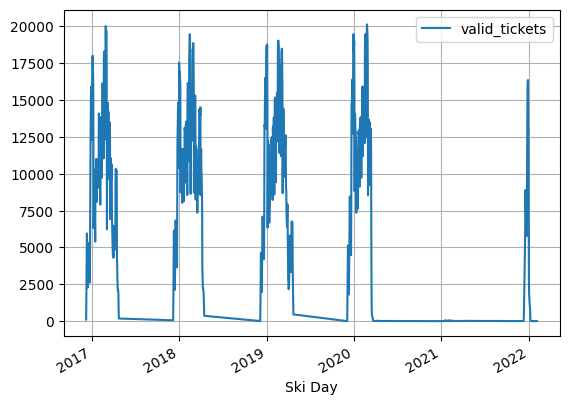

In [74]:
df.plot(x='Ski Day', y='valid_tickets', grid=True)

### Checking for start and end date for each skiing season

In [76]:
season_start_dates = []
season_end_dates = []
for year in range(2016, 2023):
    print("-> Season starts: ", df[(df['Year']==year) & (df['Ski Day']>f'{year}-09-01')]['Ski Day'].min(), "/n",
           "Season ends: ", df[(df['Year']==year+1) & (df['Ski Day']<f'{year+1}-05-01')]['Ski Day'].max())
    season_start_dates.append(df[(df['Year']==year) & (df['Ski Day']>f'{year}-09-01')]['Ski Day'].min())
    season_end_dates.append(df[(df['Year']==year+1) & (df['Ski Day']<f'{year+1}-05-01')]['Ski Day'].max())

-> Season starts:  2016-12-07 00:00:00 /n Season ends:  2017-04-23 00:00:00
-> Season starts:  2017-12-06 00:00:00 /n Season ends:  2018-04-15 00:00:00
-> Season starts:  2018-12-03 00:00:00 /n Season ends:  2019-04-23 00:00:00
-> Season starts:  2019-12-02 00:00:00 /n Season ends:  2020-04-16 00:00:00
-> Season starts:  2020-12-10 00:00:00 /n Season ends:  2021-04-04 00:00:00
-> Season starts:  2021-12-09 00:00:00 /n Season ends:  2022-02-05 00:00:00
-> Season starts:  NaT /n Season ends:  NaT


### Checking for missing dates within each winter season

In [91]:
# check if timestamps are missing - Season 2016/2017
expected = set(pd.date_range('2016-12-07', '2017-04-23', freq="d"))
actual = set(df[(df["Ski Day"]>='2016-12-07') & (df["Ski Day"]<='2017-04-23')]["Ski Day"].tolist())
diff = expected.difference(actual)
len(diff)

0

In [92]:
# check if timestamps are missing - Season 2017/2018
expected = set(pd.date_range('2017-12-06', '2018-04-15', freq="d"))
actual = set(df[(df["Ski Day"]>='2017-12-06') & (df["Ski Day"]<='2018-04-15')]["Ski Day"].tolist())
diff = expected.difference(actual)
len(diff)

0

In [93]:
# check if timestamps are missing - Season 2018/2019
expected = set(pd.date_range('2018-12-03', '2019-04-23', freq="d"))
actual = set(df[(df["Ski Day"]>='2018-12-03') & (df["Ski Day"]<='2019-04-23')]["Ski Day"].tolist())
diff = expected.difference(actual)
len(diff)

0

In [87]:
# check if timestamps are missing - Season 2019/2020
expected = set(pd.date_range('2019-12-02', '2020-04-16', freq="d"))
actual = set(df[(df["Ski Day"]>='2019-12-02') & (df["Ski Day"]<='2020-04-16')]["Ski Day"].tolist())
diff = expected.difference(actual)
len(diff)

0

In [88]:
# check if timestamps are missing - Season 2020/2021:
# - MISSING DATES
# - DATA IS DAMAGED (SEEN FROM THE PLOT AS WELL)
expected = set(pd.date_range('2020-12-10', '2021-04-04', freq="d"))
actual = set(df[(df["Ski Day"]>='2020-12-10') & (df["Ski Day"]<='2021-04-04')]["Ski Day"].tolist())
diff = expected.difference(actual)
len(diff)

36

<Axes: xlabel='Ski Day'>

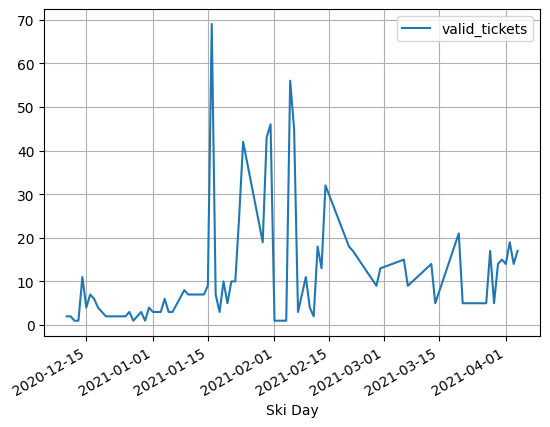

In [81]:
df[(df["Ski Day"]>='2020-12-10') & (df["Ski Day"]<='2021-04-04')].plot(x='Ski Day', y='valid_tickets', grid=True)

In [89]:
# check if timestamps are missing - Season 2021/2022 - MISSING DAYS, SHORT SEASON
# - MISSING DATES
# - DATA IS DAMAGED (SEEN FROM THE PLOT AS WELL)
# - SHORT SEASON (ENDS EARLY)
expected = set(pd.date_range('2021-12-09', '2022-02-05', freq="d"))
actual = set(df[(df["Ski Day"]>='2021-12-09') & (df["Ski Day"]<='2022-02-05')]["Ski Day"].tolist())
diff = expected.difference(actual)
len(diff)

4